In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
%matplotlib inline

In [2]:
sns.set()

In [39]:
order_data = pd.read_json(
    "../data/order_data_dtypes.json",
    orient='table',
).set_index('order_datetime').sort_index()

Both time-series and values distribution can be useful for building features so we'll focus on both.

In [42]:
order_data

,customer_id,customer_order_rank,is_failed,voucher_amount,delivery_fee,amount_paid,restaurant_id,city_id,payment_id,platform_id,transmission_id,is_returning_customer
order_datetime,,,,,,,,,,,,
2012-05-17 19:00:00,ad8f458395ae,1,0,0.0,0.493,18.1602,3783498,80562,1619,525,21124,0
2012-08-10 17:00:00,eb59ccd81693,1,0,0.0,0.000,4.1949,2413498,20326,1619,30231,4324,1
2012-09-27 15:00:00,f308e2522927,1,0,0.0,0.000,15.3990,49563498,33561,1619,525,4324,0
2012-12-08 16:00:00,f326f5034809,1,0,0.0,0.000,9.0270,89253498,36268,1619,30199,4324,1
2013-03-02 20:00:00,40d03e3d1227,1,0,0.0,0.000,10.5138,144973498,6448,1619,29815,4324,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-27 23:00:00,ef55ff70fe64,8,0,0.0,1.479,13.2219,228683498,50898,1619,30359,4228,1
2017-02-27 23:00:00,ba654dfe73a1,17,0,0.0,0.000,18.7974,105933498,10346,1779,29815,4356,1
2017-02-27 23:00:00,fbdb54f2fbdb,4,0,0.0,0.000,4.5135,174353498,69346,1779,29815,4324,1


### customer_id

<AxesSubplot:xlabel='order_datetime'>

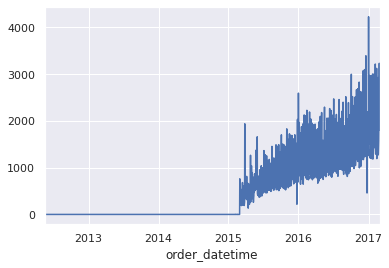

In [45]:
order_data.resample('D')['customer_order_rank'].count().plot()

<AxesSubplot:ylabel='Frequency'>

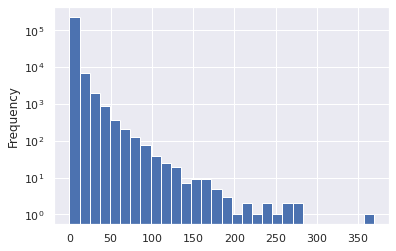

In [41]:
order_data.groupby('customer_id')['customer_order_rank'].max().plot.hist(bins=30, logy=True)

In [6]:
order_data.groupby('customer_id')['customer_order_rank'].max().value_counts()

1      148296
2       36109
3       16851
4        9645
5        6433
        ...  
214         1
142         1
216         1
156         1
179         1
Name: customer_order_rank, Length: 170, dtype: int64

In [7]:
order_data.groupby('customer_id')['customer_order_rank'].max().sort_values(ascending=False)

customer_id
15edce943edd    369
8745a335e9cf    281
d956116d863d    272
0063666607bb    266
ae60dce05485    266
               ... 
d1f6e993c05a      0
4a48a58cf909      0
2cab60314f16      0
570d64fd10ed      0
7c0e6c387d48      0
Name: customer_order_rank, Length: 245455, dtype: int64

<AxesSubplot:xlabel='order_datetime'>

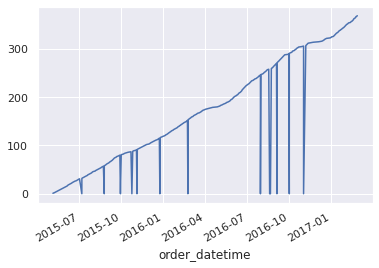

In [8]:
order_data[order_data.customer_id == '15edce943edd']['customer_order_rank'].plot()

<AxesSubplot:xlabel='order_datetime'>

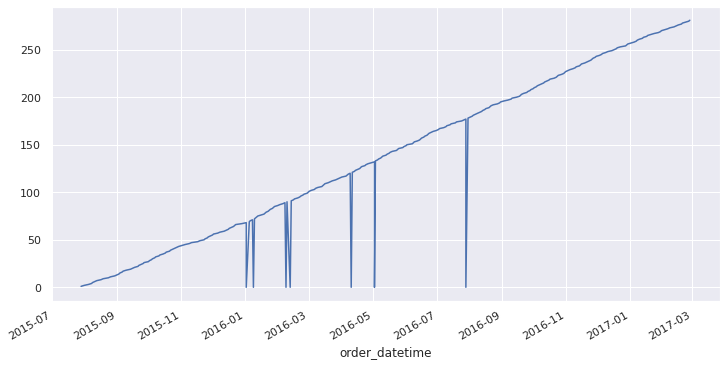

In [9]:
order_data[order_data.customer_id == '8745a335e9cf']['customer_order_rank'].plot(figsize=(12,6))

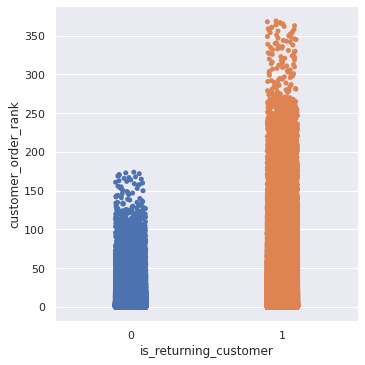

In [18]:
sns.catplot(
    x="is_returning_customer",
    y="customer_order_rank",
#     kind="box",
    data=order_data,
);

In [11]:
order_data.groupby(['is_returning_customer', 'customer_id'])['customer_order_rank'].min()

is_returning_customer  customer_id 
0                      000097eabfd9    1
                       0000e2c6d9be    1
                       00018269939b    1
                       0001a00468a6    1
                       0001d9036b5e    1
                                      ..
1                      fff88124accd    1
                       fff98c9a70ba    1
                       fffb4f172791    1
                       fffe9d5a8d41    0
                       ffff347c3cfa    1
Name: customer_order_rank, Length: 245455, dtype: int64

<AxesSubplot:ylabel='Frequency'>

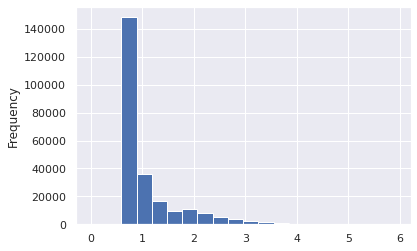

In [30]:
order_data.groupby('customer_id')['customer_order_rank'].max().apply(np.log1p).plot.hist(bins=20)

<AxesSubplot:>

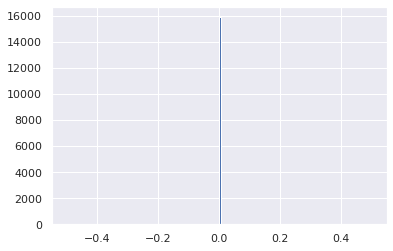

In [21]:
# customer_success_rate = order_data[
#     order_data['customer_order_rank']==0
# ].groupby('customer_id')[['is_returning_customer', 'delivery_fee']].agg(
#     {'delivery_fee': 'count', 'is_returning_customer': 'mean'}
# )
# order_data.groupby('customer_id')['customer_order_rank'].max()
customer_success_rate = order_data[
    order_data['customer_order_rank']==0
].groupby('customer_id')[['is_returning_customer', 'customer_order_rank']].agg(
    {'customer_order_rank': 'max', 'is_returning_customer': 'mean'}
)
customer_success_rate['customer_order_rank'].hist(bins=200)

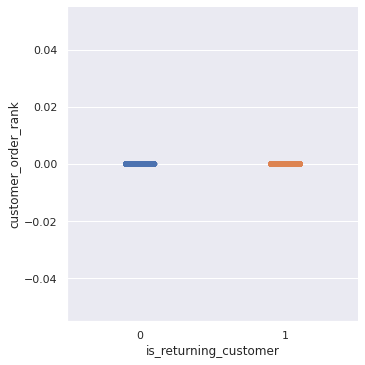

In [13]:
sns.catplot(
    x='is_returning_customer',
    y='customer_order_rank',
    data=customer_success_rate,
)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='is_returning_customer', ylabel='delivery_fee'>

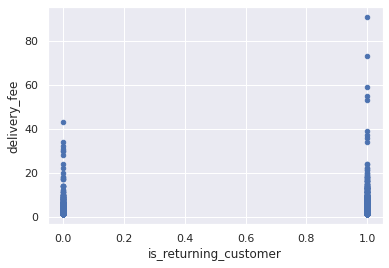

In [37]:
customer_success_rate.plot.scatter(x='is_returning_customer', y='delivery_fee')

In [39]:
customer_success_rate.describe()

,delivery_fee,is_returning_customer
count,15892.000000,15892.000000
mean,1.558457,0.486660
std,2.089326,0.499838
min,1.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,1.000000
max,91.000000,1.000000
